In [1]:
import numpy as np
import glob2
import matplotlib.pyplot as plt
import os
import json
import itertools
import pandas as pd
import seaborn as sns

In [2]:
# Four params and their values, each is a np array
queen_bee_concentrations = np.linspace(0.01, 0.5, 4)
# print("Q = {}".format(queen_bee_concentrations))

worker_bee_concentrations = np.linspace(0.005, 0.5, 4)
print("W = {}".format(worker_bee_concentrations))

diffusion_coefficients = np.linspace(0.05, 0.5, 4)
print("D = {}".format(diffusion_coefficients))

worker_bee_thresholds = np.linspace(0.001, 0.005, 4)
print("T = {}".format(worker_bee_thresholds))


W = [0.005 0.17  0.335 0.5  ]
D = [0.05 0.2  0.35 0.5 ]
T = [0.001      0.00233333 0.00366667 0.005     ]


In [24]:
# Get names of all 64 json's
json_list = list(map(lambda x : x.split("/")[-1], glob2.glob("avg_distance_data/*.json")))

In [4]:
def get_matching_filenames(json_list, param_1, param_2, value_1, value_2):
    matching_json_names = []
    for i in range(len(json_list)):
        if (json_list[i].find(param_1+str(value_1)) != -1) and (json_list[i].find(param_2+str(value_2)) != -1):
            matching_json_names.append(json_list[i])
    
    return matching_json_names

In [8]:
# # Test above function on 1 set of param pair values
# names = get_matching_filenames(json_list, "Q", "W", 0.01, 0.005)
# print(names)

In [5]:
def get_ending_distances(json_file):
    # Get the 10 ending values of a single json
    with open("avg_distance_data/" + json_file, "r") as f:
        data = json.load(f)
        # print(data)
        
    # For 1 JSON of 10 replicate swarms: going through its 10 lists
    dist_list = []
    for i in range(len(data)):
        ending_dist = data[i][-1]
        dist_list.append(ending_dist)
        
    dist_avg = np.median(dist_list)
    dist_var = np.var(dist_list)
    
    return dist_avg, dist_var

In [7]:
# Testing above function
x = get_ending_distances("Q0.17333333333333334_W0.5_D0.2_T0.001.json")
print(x)

(3.654189784839139, 0.06466756133447867)


In [8]:
def get_mean_var(json_list, param_1, param_2, value_1, value_2):

    # Load in a json list and get ending value of each list, then average and variance those 160 values
    
#     param_pair_distances = []
    # print(len(param_pair_distances))
    # print(param_pair_distances[0])

    averages = []
    variances = []
    
    names = get_matching_filenames(json_list, param_1, param_2, value_1, value_2)

    for n in names:
        # print(n)
        distance_tuple = get_ending_distances(n)
        # print(distance_tuple)
        averages.append(distance_tuple[0])
        variances.append(distance_tuple[1])

#     # Merge lists in param_pair_distances
#     merged = list(itertools.chain.from_iterable(param_pair_distances))
#     # print(merged)
#     merged_mean = np.mean(merged)
#     # print(merged_mean)
#     merged_var = np.var(merged)
#     # print(merged_var)
    
#     return merged_mean, merged_var
    return np.median(averages), np.median(variances)


In [16]:
# Test above function
get_mean_var(json_list, "W", "D", 0.005, 0.5)

(0.022955878097973385, 6.441175532668336e-06)

In [17]:
# Test above function
get_mean_var(json_list, "W", "T", 0.5, 0.001)

(3.7363824070477496, 0.06047213153547721)

In [18]:
# Iterate through different pairs of params and their values

def compare_params(json_list, param_1, param_2, list_1, value_2):
    # Create one column for a W values against 4 queen values
    all_averages = []
    all_variances = []
    for item in list_1:
        # print(item)
        mean_var = get_mean_var(json_list, param_1, param_2, item, value_2)
        # print(mean_var)
        all_averages.append(mean_var[0])
        all_variances.append(mean_var[1]) 
        
    return all_averages, all_variances

In [22]:
# Test
compare_params(json_list, "W", "D", worker_bee_concentrations, 0.05)
# test_variances = compare_params(json_list, "Q", "W", queen_bee_concentrations, 0.005)
# test_means

([2.8743878225241737, 3.150664040496416, 3.178686720176358, 3.144458254656927],
 [0.12124700233577942,
  0.01940788889699916,
  0.011929965610283009,
  0.013791541970146003])

## Returning DF 

In [23]:
def get_dataframe(json_list, param_1, list_1, param_2, list_2, avg_or_var, index_array):
    
    # Get 4 lists of values contained in cumulative list
    vals_list = []
    for val in list_2:
        if avg_or_var == "avg":
            x = compare_params(json_list, param_1, param_2, list_1, val)[0]
            vals_list.append(x)
        elif avg_or_var == "var":
            x = compare_params(json_list, param_1, param_2, list_1, val)[1]
            vals_list.append(x)
        
    # Turn into dict
    data = {}
    for i, key in enumerate(list_2):
        if len(str(key)) >= 5:
            key = "{0:.3f}".format(key)
            # print(key, type(key))
            data[key] = vals_list[i]
        else:
            # print(key, type(key))
            data[key] = vals_list[i]
            
    # Turn into dataframe 
    df = pd.DataFrame(data, index=[index_array])

    return df


### Queen vs Worker

In [42]:
Q_W_avg_df = get_dataframe(json_list, "Q", queen_bee_concentrations, "W", worker_bee_concentrations, "avg", [0.01, 0.173, 0.34, 0.5])
print("Q_W_avg_df:")
print(Q_W_avg_df)
print("\n")

Q_W_var_df = get_dataframe(json_list, "Q", queen_bee_concentrations, "W", worker_bee_concentrations, "var", [0.01, 0.173, 0.34, 0.5])
print("Q_W_var_df:")
print(Q_W_var_df)
print("\n")

/Users/dieumynguyen/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/dieumynguyen/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Q_W_avg_df:
          0.005      0.17     0.335       0.5
0.010       NaN       NaN       NaN       NaN
0.173  0.028012  3.349665  3.650892  3.654042
0.340       NaN       NaN       NaN       NaN
0.500       NaN       NaN       NaN       NaN


Q_W_var_df:
          0.005      0.17     0.335       0.5
0.010       NaN       NaN       NaN       NaN
0.173  0.000012  0.148303  0.079385  0.060472
0.340       NaN       NaN       NaN       NaN
0.500       NaN       NaN       NaN       NaN




### Queen vs Coefficient

In [61]:
# Q_D_avg_df = get_dataframe(json_list, "Q", queen_bee_concentrations, "D", diffusion_coefficients, "avg", [0.01, 0.173, 0.34, 0.5])
# print("Q_D_avg_df:")
# print(Q_D_avg_df)
# print("\n")

# Q_D_var_df = get_dataframe(json_list, "Q", queen_bee_concentrations, "D", diffusion_coefficients, "var", [0.01, 0.173, 0.34, 0.5])
# print("Q_D_var_df:")
# print(Q_D_var_df)
# print("\n")

### Queen vs Threshold

In [62]:
# Q_T_avg_df = get_dataframe(json_list, "Q", queen_bee_concentrations, "T", worker_bee_thresholds, "avg", [0.01, 0.173, 0.34, 0.5])
# print("Q_T_avg_df:")
# print(Q_T_avg_df)
# print("\n")

# Q_T_var_df = get_dataframe(json_list, "Q", queen_bee_concentrations, "T", worker_bee_thresholds, "var", [0.01, 0.173, 0.34, 0.5])
# print("Q_T_var_df:")
# print(Q_T_var_df)
# print("\n")

### Worker vs Coefficient

In [63]:
# W_D_avg_df = get_dataframe(json_list, "W", worker_bee_concentrations, "D", diffusion_coefficients, "avg", worker_bee_concentrations)
# print("W_D_avg_df:")
# print(W_D_avg_df)
# print("\n")

# W_D_var_df = get_dataframe(json_list, "W", worker_bee_concentrations, "D", diffusion_coefficients, "var", worker_bee_concentrations)
# print("W_D_var_df:")
# print(W_D_var_df)
# print("\n")

### Worker vs Threshold

In [64]:
# W_T_avg_df = get_dataframe(json_list, "W", worker_bee_concentrations, "T", worker_bee_thresholds, "avg", worker_bee_concentrations)
# print("W_T_avg_df:")
# print(W_T_avg_df)
# print("\n")

# W_T_var_df = get_dataframe(json_list, "W", worker_bee_concentrations, "T", worker_bee_thresholds, "var", worker_bee_concentrations)
# print("W_T_var_df:")
# print(W_T_var_df)
# print("\n")

### Coefficient vs Threshold

In [65]:
# D_T_avg_df = get_dataframe(json_list, "D", diffusion_coefficients, "T", worker_bee_thresholds, "avg", diffusion_coefficients)
# print("D_T_avg_df:")
# print(D_T_avg_df)
# print("\n")

# D_T_var_df = get_dataframe(json_list, "D", diffusion_coefficients, "T", worker_bee_thresholds, "var", diffusion_coefficients)
# print("D_T_var_df:")
# print(D_T_var_df)
# print("\n")

## Plotting heatmap from dataframe for a pair of params

In [101]:
def plot_heatmap(df_avg, df_var, x_label, y_label, filename, t_value):
    
    sns.set(font_scale = 1.5)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(14,4))
    
    sns.heatmap(df_avg, cmap="Greens", cbar_kws={'label': 'Average distance'}, ax=ax1)
    ax1.set_xlabel(x_label)
    ax1.set_ylabel(y_label)
    ax1.set_title('Average distance from queen')
    
    sns.heatmap(df_var, cmap="Blues", cbar_kws={'label': 'Variance distance'}, ax=ax2)
    ax2.set_xlabel(x_label)
    ax2.set_ylabel(y_label)
    ax2.set_title('Variance distance from queen')

    ax1.invert_yaxis()
    ax2.invert_yaxis()
    
    # ax1.set_xticks(x_ticks)

    fig.text(0.5, 0., "Worker activation threshold = {}".format(t_value), ha='center', va='center')
    # fig.text(-0.02, -0.1, y_label, ha='center', va='center')
    
    
    plt.gcf().subplots_adjust(bottom=0.20)
    # plt.title(plot_title)
    plt.savefig('figures/param_heatmap/{}.pdf'.format(filename))

In [79]:
# plot_heatmap(Q_W_avg_df, Q_W_var_df, 'Worker concentration', 'Queen concentration', 'Queen_Worker')


In [80]:
# plot_heatmap(Q_D_avg_df, Q_D_var_df, 'Diffusion coefficient', 'Queen concentration', 'Queen_Coefficient')


In [81]:
# plot_heatmap(Q_T_avg_df, Q_T_var_df, 'Activation threshold', 'Queen concentration', 'Queen_Threshold')

In [82]:
# plot_heatmap(W_D_avg_df, W_D_var_df, 'Diffusion coefficient', 'Worker concentration', "Worker_Coefficient")


In [83]:
# plot_heatmap(W_T_avg_df, W_T_var_df, 'Activation threshold', 'Worker concentration', "Worker_Threshold")


In [84]:
# plot_heatmap(D_T_avg_df, D_T_var_df, 'Activation threshold', 'Diffusion coefficient', "Coefficient_Threshold")

## Re-plotting with 3 free parameters while Q is fixed

In [91]:
worker_bee_thresholds[0]

0.001

In [92]:
# Get names of all json's for a single T value - do this 4 times - each T has 16 files

jsons_T_1 = list(map(lambda x : x.split("/")[-1], glob2.glob("avg_distance_data/*T{}.json".format(worker_bee_thresholds[0]))))
# jsons_T_2 = list(map(lambda x : x.split("/")[-1], glob2.glob("avg_distance_data/*.json")))
# jsons_T_3 = list(map(lambda x : x.split("/")[-1], glob2.glob("avg_distance_data/*.json")))
# jsons_T_4 = list(map(lambda x : x.split("/")[-1], glob2.glob("avg_distance_data/*.json")))

In [93]:
jsons_T_1

['Q0.17333333333333334_W0.005_D0.05_T0.001.json',
 'Q0.17333333333333334_W0.005_D0.2_T0.001.json',
 'Q0.17333333333333334_W0.005_D0.35_T0.001.json',
 'Q0.17333333333333334_W0.005_D0.5_T0.001.json',
 'Q0.17333333333333334_W0.17_D0.05_T0.001.json',
 'Q0.17333333333333334_W0.17_D0.2_T0.001.json',
 'Q0.17333333333333334_W0.17_D0.35_T0.001.json',
 'Q0.17333333333333334_W0.17_D0.5_T0.001.json',
 'Q0.17333333333333334_W0.335_D0.05_T0.001.json',
 'Q0.17333333333333334_W0.335_D0.2_T0.001.json',
 'Q0.17333333333333334_W0.335_D0.35_T0.001.json',
 'Q0.17333333333333334_W0.335_D0.5_T0.001.json',
 'Q0.17333333333333334_W0.5_D0.05_T0.001.json',
 'Q0.17333333333333334_W0.5_D0.2_T0.001.json',
 'Q0.17333333333333334_W0.5_D0.35_T0.001.json',
 'Q0.17333333333333334_W0.5_D0.5_T0.001.json']

### T = 0.001 heatmaps for W vs D

In [94]:
W_D_avg_df_2 = get_dataframe(jsons_T_1, "W", worker_bee_concentrations, "D", diffusion_coefficients, "avg", worker_bee_concentrations)
print("W_D_avg_df:")
print(W_D_avg_df_2)
print("\n")

W_D_var_df_2 = get_dataframe(jsons_T_1, "W", worker_bee_concentrations, "D", diffusion_coefficients, "var", worker_bee_concentrations)
print("W_D_var_df:")
print(W_D_var_df_2)
print("\n")

W_D_avg_df:
           0.05      0.20      0.35      0.50
0.005  2.916626  0.031652  0.023642  0.022520
0.170  3.309629  3.466017  3.492921  3.390288
0.335  3.229457  3.577624  3.882615  3.648283
0.500  3.224092  3.654190  3.818575  3.879653


W_D_var_df:
           0.05      0.20      0.35      0.50
0.005  0.214729  0.000017  0.000002  0.000005
0.170  0.039639  0.761280  0.647708  0.105561
0.335  0.015453  1.145309  0.028880  0.109541
0.500  0.012875  0.064668  0.056277  0.268176




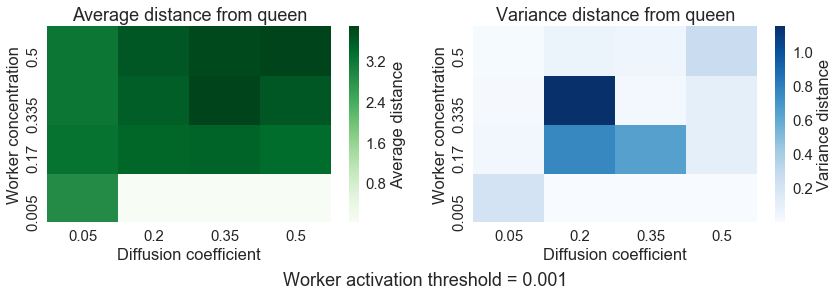

In [102]:
plot_heatmap(W_D_avg_df_2, W_D_var_df_2, 'Diffusion coefficient', 'Worker concentration', 
             "Threshold_0.001_Worker_Coefficient", 0.001)
